# Exercise: Classify Flowers with a Decision Tree

In this exercise, we'll classify three different iris flower types using a decision tree classifier. 

Your tasks are the following:

- Identify the data types of `X` and `y`
- Get an overview of the dataset
- Plot a histogram of the data
- Split into training and test data
- Examine the shape of your training data
- Train a decision tree
- Make predictions with your model
- Calculate the accuracy

## 1. Data Analysis

In [1]:
# import packages
import numpy as np 
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load data
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
# store features and labels in X and y
X = iris.data
y = iris.target

In [4]:
# print description of dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

**TODO**: Which data types are X and y, respectively?

In [5]:
# TODO: YOUR CODE GOES HERE

print(f"Type of X are:\n{X.dtypes}")
print(f"Type of y is:\n{type(y)}")

Type of X are:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object
Type of y is:
<class 'pandas.core.series.Series'>


**YOUR ANSWER**:

**TODO**: Get an overview of the dataset and answer the following questions:
- How many features are in the dataset?
- How many samples are in the dataset?
- Which labels do exist?
- Are there empty data entries that we have to take care of?
- Are there categorical or numerical attributes?

In [6]:
# TODO: YOUR CODE GOES HERE

print(f"The number of features: {X.shape[1]}")
print(f"The number of samples: {X.shape[0]}")
print(f"Columns: {X.columns}")


The number of features: 4
The number of samples: 150
Columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [7]:
print("Check for any empty values in the dataset:")
X.isnull().sum()

Check for any empty values in the dataset:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
print("Check types of each column:")
print("\nX columns are floats: ")
print(f"{X.dtypes}")
print("\ny is an integer but is categorical as we will see later: ")
print(f"{y.dtypes}")

Check types of each column:

X columns are floats: 
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

y is an integer but is categorical as we will see later: 
int64


In [9]:
# another way is to use info method

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
# get some basic statistics for the X dataset
print("Basic statistics for the X dataset:")
print(X.describe())
# get some basic statistics for the y dataset
print("Basic statistics for the y dataset:")
print(y.describe())
# check the distribution of the target variable
print("Distribution of the target variable:")
print(y.value_counts())


Basic statistics for the X dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
Basic statistics for the y dataset:
count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%     

**YOUR ANSWER**:

**TODO**: Plot a histogram of the data. Can you guess which features might be more important than others?

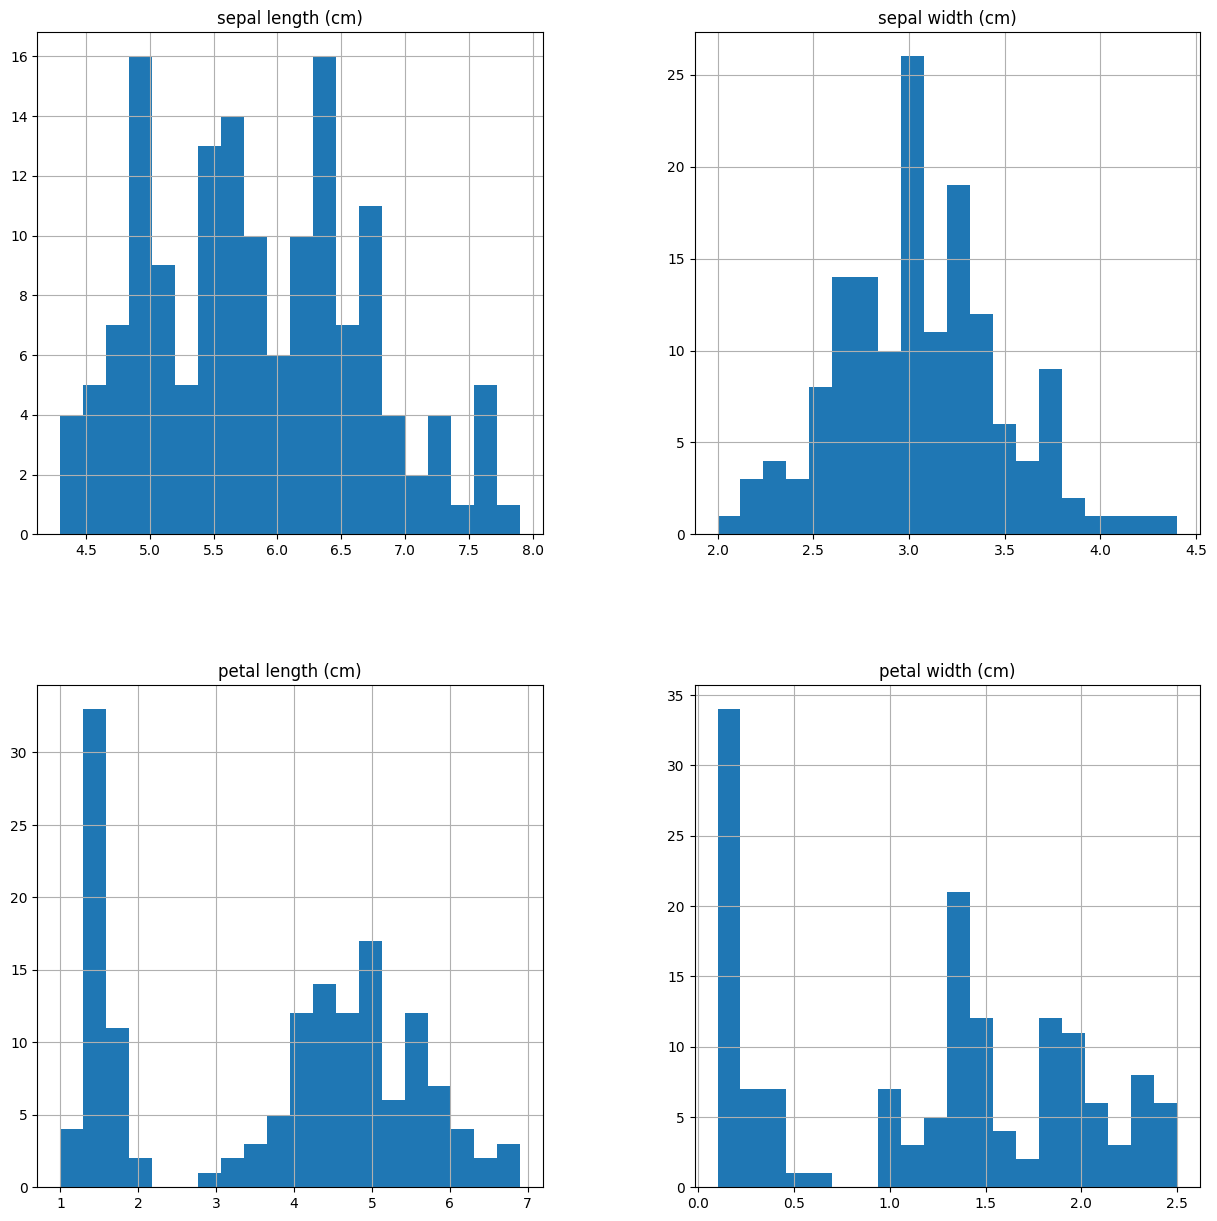

In [11]:
X.hist(bins=20, figsize=(15,15)); 


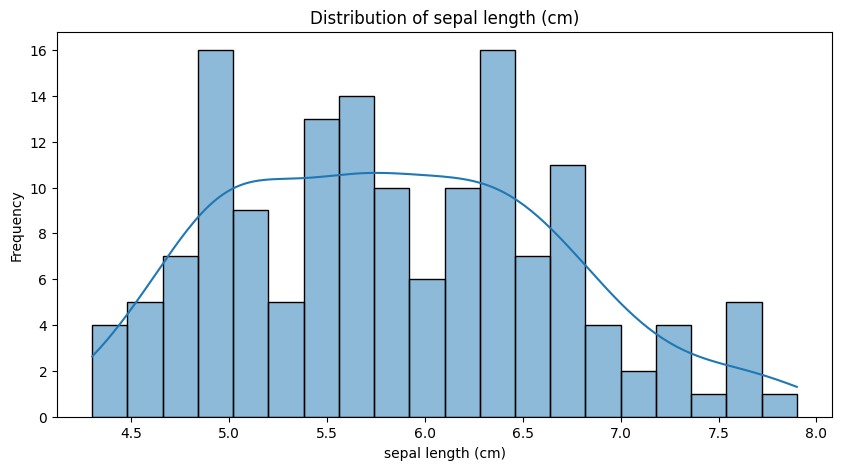

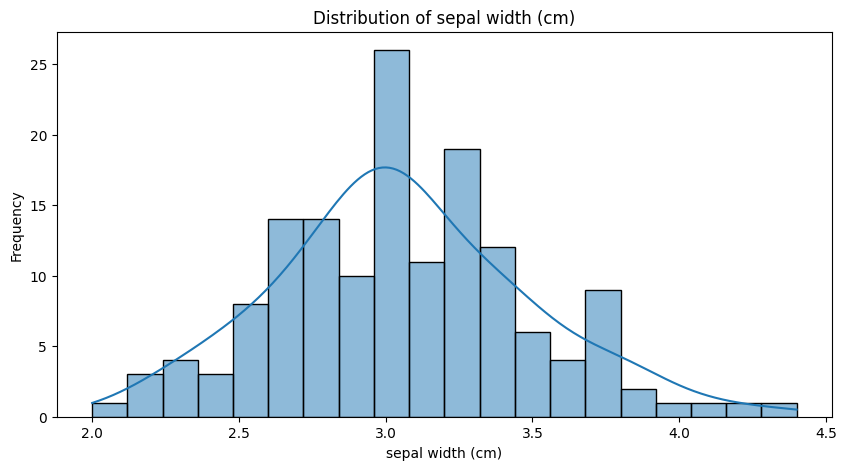

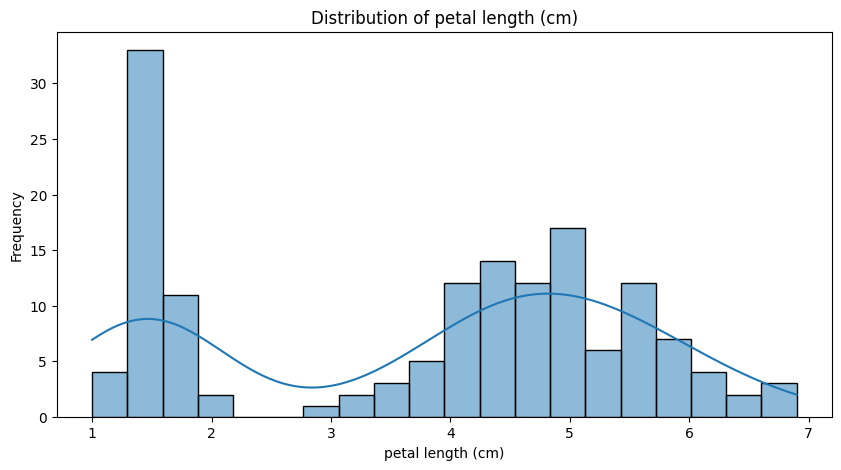

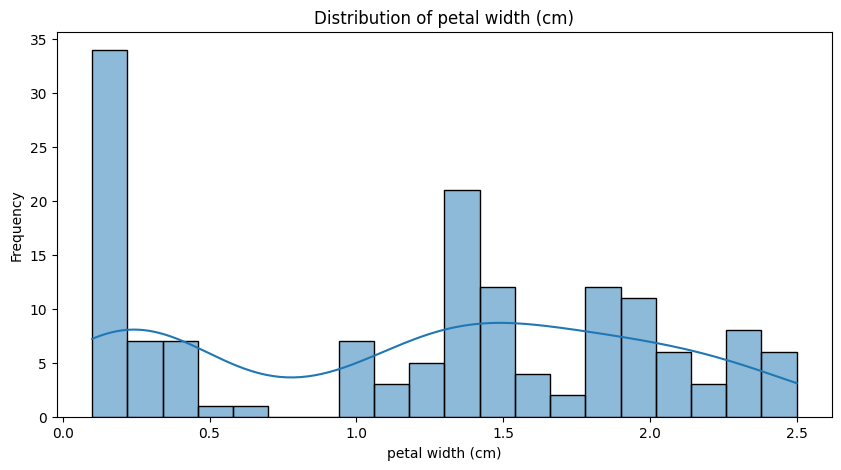

In [12]:
for col in X.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(X[col], kde=True, bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

In [13]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

<Axes: >

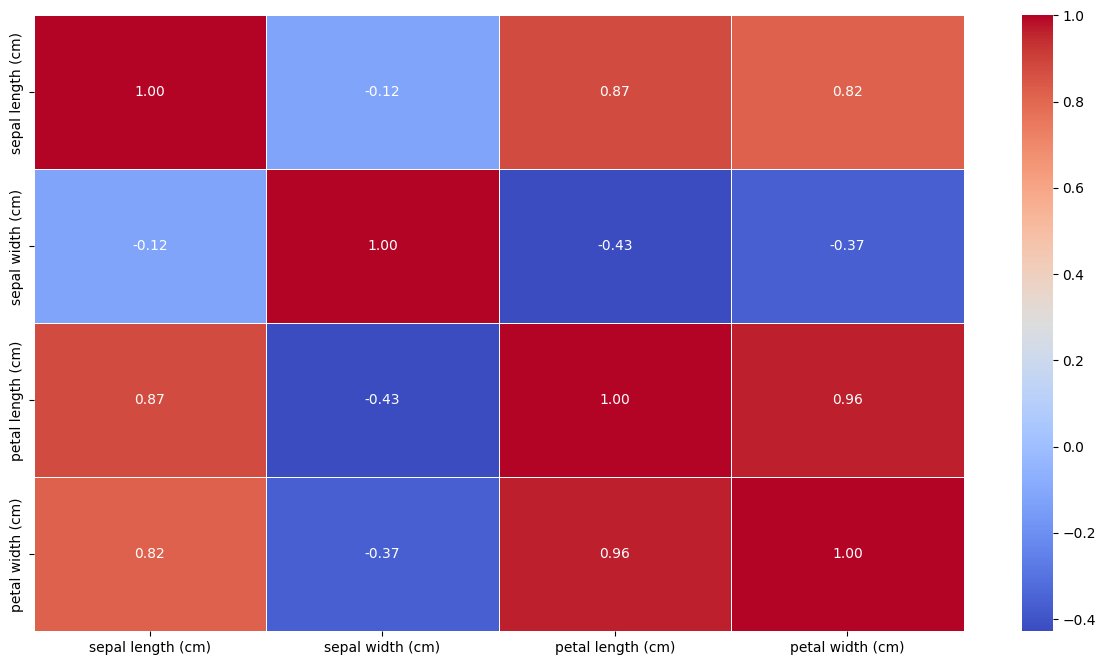

In [14]:
# let's prepare a heatmap to visualize the correlation between features

plt.figure(figsize=(15, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

In [15]:

# TODO: YOUR CODE GOES HERE

**YOUR ANSWER**:

We can see from above heatmap that petal length and petal width have the strongest correlation

# 2. Training and Evaluation

In [16]:
# we only use 2 features for training
X = iris.data[["petal length (cm)", "petal width (cm)"]]

OMMARIO NOTES - THE KEY STEPS FOR A MACHINE LEARNING MODEL
1. Create the X and y datasets
2. Create training and test data
3. Instantiate the model
4. Fit the model
5. Predict with the model
6. Evaluate the model

**TODO**: Split `X` and `y` in training and test data. Save the result in variables called `X_train`, `X_test`, `y_train`, `y_test`. 

In [17]:
# TODO: YOUR CODE GOES HERE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**TODO**: How many samples are contained in `X_test`? Which data format do we have here?

In [18]:
# TODO: YOUR CODE GOES HERE

print(f"The number of samples in X_test are: {X_test.shape[0]}")

The number of samples in X_test are: 30


**YOUR ANSWER**:

**TODO**: Fit a `DecisionTreeClassifier` with `max_depth=3` and `random_state` set to a value of your choice on the training data!

In [19]:
# TODO: YOUR CODE GOES HERE

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=42)

**TODO**: Calculate the predictions on training and test data and save the result in `y_pred_train` and `y_pred_test`, respectively.

In [20]:
# TODO: YOUR CODE GOES HERE

# fit the model
model.fit(X_train, y_train)
# predict on the test set
y_pred = model.predict(X_test)


**TODO**: Evaluate your model by calculating the accuracy on training and test data, i.e. the number of correctly classified samples normalized over all samples:

$
\text{Accuracy} = \frac{\text{\# correctly classified samples}}{\text{\# samples}}
$

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


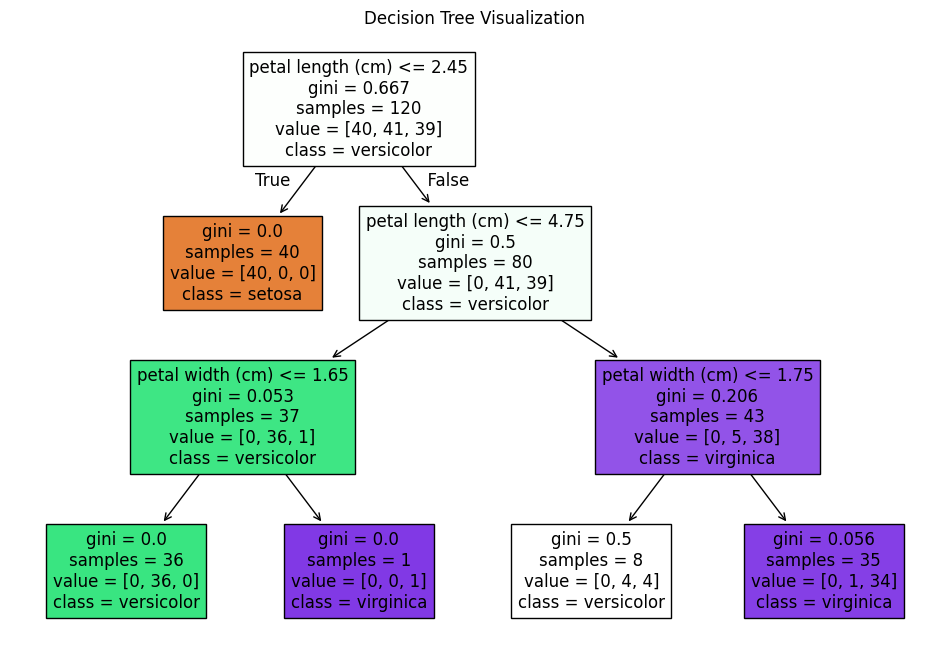

In [21]:
# TODO: YOUR CODE GOES HERE
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# visualize the decision tree
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=iris.target_names)
plt.title("Decision Tree Visualization")
plt.show()


In [22]:
# calculate accuracy

from sklearn.metrics import accuracy_score

# I already have y_pred from the model prediction.  This will let me test accuracy of test data.
# calculate prediction based on training data to test training data accuracy.

y_train_pred = model.predict(X_train)

train_accuracy = accuracy_score(y_train_pred, y_train)
test_accuracy = accuracy_score(y_pred, y_test)

In [23]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.96
Test Accuracy: 1.00
